In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN (adding color channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 categories in Fashion MNIST
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.7754 - loss: 0.6213 - val_accuracy: 0.8774 - val_loss: 0.3500
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - accuracy: 0.8868 - loss: 0.3120 - val_accuracy: 0.8931 - val_loss: 0.2974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9038 - loss: 0.2590 - val_accuracy: 0.9027 - val_loss: 0.2682
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9183 - loss: 0.2206 - val_accuracy: 0.9048 - val_loss: 0.2604
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9278 - loss: 0.1907 - val_accuracy: 0.9050 - val_loss: 0.2649
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9376 - loss: 0.1666 - val_accuracy: 0.9091 - val_loss: 0.2569
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9442 - loss: 0.1483 - val_accuracy: 0.9058 - val_loss: 0.2628
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9509 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


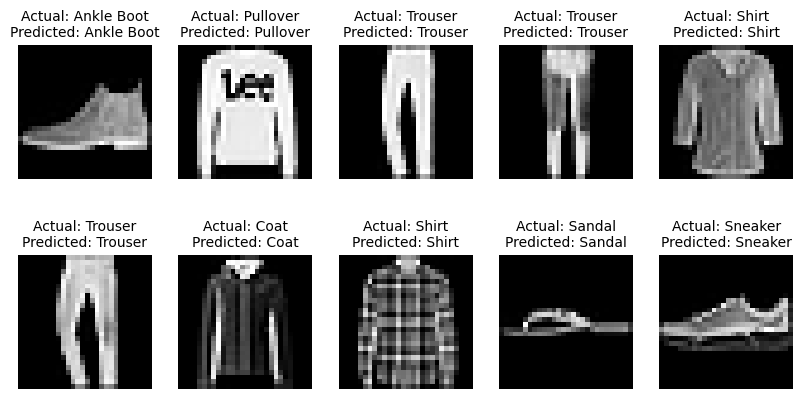

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define class labels for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Get model predictions for test images
y_pred_probs = model.predict(X_test[:10])  # Predict first 10 images
y_pred = np.argmax(y_pred_probs, axis=1)  # Get class index with highest probability

# Plot images with actual & predicted labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")  # Reshape for visualization
    plt.title(f"Actual: {class_names[y_test[i]]}\nPredicted: {class_names[y_pred[i]]}", fontsize=10)
    plt.axis("off")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


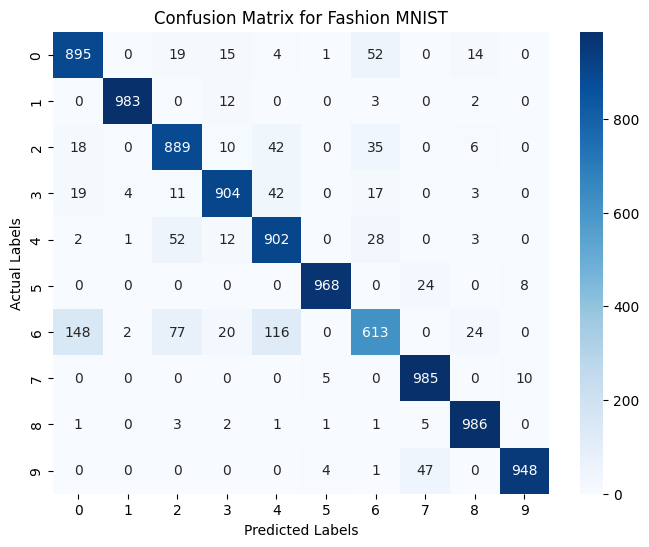

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Fashion MNIST")
plt.show()